In [1]:
# load required libraries
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import read_excel

import xlsxwriter

import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as ticker
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.style.use('seaborn')

import six

from datetime import datetime, timedelta

# environment settings:
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_column',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.max_seq_items',None)
pd.set_option('display.max_colwidth', 500)
pd.set_option('expand_frame_repr', True)


In [2]:
#load current employment
df = pd.read_excel('secrid_humanresource.xlsx',0) #load first spreadsheet of SECRID HR DATA.xlxs 

In [ ]:
df.head() #preview first five rows

In [ ]:
df.tail() #preview last five rows

In [3]:
# Check size of the dataframe 
df.shape 

(114, 19)

In [ ]:
# list names of columns in dataframe
df.columns 

In [ ]:
# View info of the dataframe 
df.info()

In [4]:
# Create copy of original DataFrame
df_clean = df.copy()

**Test**

In [ ]:
df_clean.columns #List of column names in df_clean Dataframe

In [5]:
#set appropriate data types 
# use .astype to change data type of dataframe columns
df_clean = df_clean.astype({"id_number":'category',"name":'category', "gender":'category', "age":'int',"FTE":'float', "salary_type":'category', "current_position":'category', "departments":'category',"costs_center":'category',"years_in_company":'float',})

In [6]:
# subset to only columns of interest
df_clean = df_clean[['id_number','name','gender','age','FTE','salary_type','current_position','departments','years_in_company']]

**Test**

In [ ]:
df_clean.head()

In [7]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 9 columns):
id_number           114 non-null category
name                114 non-null category
gender              114 non-null category
age                 114 non-null int64
FTE                 114 non-null float64
salary_type         114 non-null category
current_position    114 non-null category
departments         114 non-null category
years_in_company    114 non-null float64
dtypes: category(6), float64(2), int64(1)
memory usage: 19.2 KB


### variable : department

In [8]:
df_clean.departments.describe()#overview of variable; count, unique, top,freq

count                      114
unique                      13
top       6 | Customer Service
freq                        19
Name: departments, dtype: object

In [9]:
print (df_clean.departments.cat.categories)# list all unique departments

Index(['1 | Product Development', '10 | HR/Office Administration',
       '11 | Stand-By General', '13 | Board', '14 | Facility',
       '2 | Production/ Assemblies', '3 | Supply Chain Management',
       '4 | Distribution', '5 | Sales', '6 | Customer Service',
       '7 | Marketing & Communication', '8 | ICT/Analyse',
       '9 | Finance & Legal'],
      dtype='object')


In [10]:
print(df_clean.departments.isnull().sum())  #Number of missing values in departments column

0


In [11]:
#Depatment means/averages
averages= df_clean.groupby(['departments']).mean()


In [12]:
averages

,age,FTE,years_in_company
departments,,,
1 | Product Development,31.25,0.81,1.98
10 | HR/Office Administration,32.92,0.53,2.80
11 | Stand-By General,22.00,0.70,7.27
13 | Board,55.00,1.00,7.81
14 | Facility,33.29,0.66,1.64
2 | Production/ Assemblies,27.50,0.95,2.84
3 | Supply Chain Management,29.79,0.93,3.87
4 | Distribution,38.50,1.00,2.88
5 | Sales,28.00,0.99,3.54


In [13]:
# number of males and females per department
totalheadcount = df_clean.groupby(['departments', 'gender']).size().reset_index(name='Count')       

In [14]:
totalheadcount

,departments,gender,Count
0,1 | Product Development,f,6
1,1 | Product Development,m,10
2,10 | HR/Office Administration,f,7
3,10 | HR/Office Administration,m,5
4,11 | Stand-By General,f,1
5,13 | Board,f,1
6,14 | Facility,f,5
7,14 | Facility,m,2
8,2 | Production/ Assemblies,f,1
9,2 | Production/ Assemblies,m,1


In [15]:
# FTE worforce total per department
FTEcount = df_clean.groupby(
   ['departments']
).agg(
    {
         'FTE':sum,    # Sum fte per department
         
    }
)

FTEcount.sort_values(by=['FTE'], inplace=True, ascending=False)

In [16]:
FTEcount

,FTE
departments,
6 | Customer Service,15.90
1 | Product Development,13.00
3 | Supply Chain Management,13.00
7 | Marketing & Communication,10.00
8 | ICT/Analyse,9.75
5 | Sales,8.90
9 | Finance & Legal,6.60
10 | HR/Office Administration,6.30
14 | Facility,4.60


In [ ]:
# age workforce( max age per department)
agecount = df_clean.groupby(
   ['departments']
).agg(
    {
         'age':max,    
         
         
    }
)

agecount.sort_values(by=['age'], inplace=True, ascending=False)

In [ ]:
agecount

In [17]:
df_clean['age_by_decade'] = pd.cut(x=df_clean['age'], bins=[0,20,29,39,49,59,69], labels=['0-20','21-29', '30-39', '40-49', '50-59','60-69'])

In [ ]:
df_clean

In [18]:
x = df_clean['age_by_decade'].value_counts() 

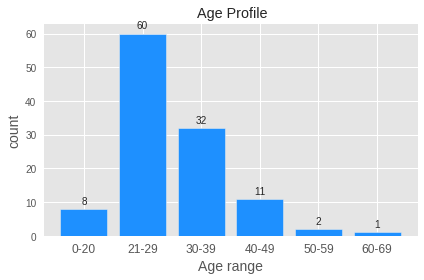

In [22]:
plt.style.use('ggplot')

x = ['0-20','21-29', '30-39','40-49','50-59','60-69']
agecount = [8,60,32,11,2,1]

x_pos = [i for i, _ in enumerate(x)]

p = plt.bar(x_pos, agecount, color='#1E90FF')
plt.xlabel("Age range",fontsize=14)
plt.ylabel("count",fontsize=14)
plt.title(" Age Profile")
plt.xticks(x_pos, x, fontsize=12)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        plt.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(p)
plt.tight_layout()
plt.savefig('age.png',type="png",dpi=300,bbox_inches='tight', pad_inches=0)#Export graph as .p

plt.show()

## FTE

In [ ]:
#load 2015
df1 = pd.read_excel('secrid_humanresource.xlsx',7) #load 2015 spreadsheet of SECRID HR DATA.xlxs 

In [ ]:
df1.head()

In [ ]:
#load 2016
df2 = pd.read_excel('secrid_humanresource.xlsx',6) #load 2016 spreadsheet of SECRID HR DATA.xlxs

In [ ]:
df2.head()

In [ ]:
#load 2017
df3 = pd.read_excel('secrid_humanresource.xlsx',5) #load 2017 spreadsheet of SECRID HR DATA.xlxs

In [ ]:
#load 2018
df4 = pd.read_excel('secrid_humanresource.xlsx',4) #load 2018 spreadsheet of SECRID HR DATA.xlxs

In [ ]:
#load 2019
df5 = pd.read_excel('secrid_humanresource.xlsx',3) #load 2019 spreadsheet of SECRID HR DATA.xlxs

In [ ]:
#combine df1, df2, df3, df4 and df5  into one complete dataframe 'df' for sales data
dftotal = pd.concat([df1, df2, df3, df4, df5], sort=False)

In [ ]:
dftotal.head()

In [ ]:
dftotal.columns

In [ ]:
dftotal.info()

In [ ]:
dftotal['jan_FTE'] = pd.to_numeric(dftotal['jan_FTE'], errors='coerce')


In [ ]:
dftotal[['jan_FTE', 'feb_FTE','dec_FTE','nov_FTE','oct_FTE','sept_FTE','august_FTE','july_FTE','june_FTE','may_FTE','april_FTE','mar_FTE']] = dftotal[['jan_FTE', 'feb_FTE','dec_FTE','nov_FTE','oct_FTE','sept_FTE','august_FTE','july_FTE','june_FTE','may_FTE','april_FTE','mar_FTE']].apply(pd.to_numeric,  errors='coerce') 

In [ ]:
dftotal.info()

In [ ]:
# age workforce( max age per department)
yearcount = dftotal.groupby(
   ['year']
).agg(
    {
         'jan_hc':sum,
         'jan_FTE':sum,
         'feb_hc':sum,
         'feb_FTE':sum,
         'mar_hc':sum,
         'mar_FTE':sum,
         'april_hc':sum,
         'april_FTE':sum,
         'may_hc':sum,
         'may_FTE':sum,
         'june_hc':sum,
         'june_FTE':sum,
         'july_hc':sum,
         'july_FTE':sum,
         'august_hc':sum,
         'august_FTE':sum,
         'sept_hc':sum,
         'sept_FTE':sum,
         'oct_hc':sum,
         'oct_FTE':sum,
         'nov_hc':sum,
         'nov_FTE':sum,
         'dec_hc':sum,        
         'dec_FTE':sum,       
         
    }
)

yearcount.sort_values(by=['year'], inplace=True, ascending=True)

In [ ]:
yearcount

In [ ]:
# age workforce( max age per department)
departmentcount = dftotal.groupby(
   ['year','department']
).agg(
    {
         'jan_hc':sum,
         'jan_FTE':sum,
         'feb_hc':sum,
         'feb_FTE':sum,
         'mar_hc':sum,
         'mar_FTE':sum,
         'april_hc':sum,
         'april_FTE':sum,
         'may_hc':sum,
         'may_FTE':sum,
         'june_hc':sum,
         'june_FTE':sum,
         'july_hc':sum,
         'july_FTE':sum,
         'august_hc':sum,
         'august_FTE':sum,
         'sept_hc':sum,
         'sept_FTE':sum,
         'oct_hc':sum,
         'oct_FTE':sum,
         'nov_hc':sum,
         'nov_FTE':sum,
         'dec_hc':sum,        
         'dec_FTE':sum,
         
    }
)

departmentcount.sort_values(by=['year'], inplace=True, ascending=True)

In [ ]:
departmentcount

In [ ]:
#departmenttable = pd.pivot_table(dftotal, index=["year"],columns=["department"],
                      # values=["jan_hc"],aggfunc=sum, margins=False)